In [23]:
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
from astroquery.hips2fits import hips2fits

import astropy.units as u

from astropy.coordinates import Longitude, Latitude, Angle

In [24]:
Vizier.ROW_LIMIT = -1

In [25]:
low_z = Vizier(catalog='J/ApJS/186/427/table2').query_constraints(zs="<0.011")[0]


In [26]:
low_z

SDSS,zs,g_mag,r_mag,log_M_,Age,b_a,sigma,TT,_RA,_DE
,,mag,mag,log(solMass),Gyr,,km / s,,deg,deg
str20,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64
J013317.71+131955.29,0.010,14.799,14.262,9.145,--,0.197,77.810,6,23.32379,13.332025
J100200.94+591508.58,0.010,14.502,13.914,9.533,--,0.721,61.860,-5,150.50392,59.252383
J100351.85+592610.58,0.010,14.302,13.774,9.735,--,0.876,88.920,-5,150.96604,59.436272
J132434.68+630532.47,0.010,14.519,14.175,9.210,--,0.450,23.240,6,201.14450,63.092353
J172446.39+581220.82,0.010,15.415,15.026,8.763,1.398,0.242,71.120,6,261.19329,58.205783
J125515.53+025347.92,0.010,13.543,12.793,10.363,--,0.360,83.890,4,193.81471,2.896644
J121655.78+632435.86,0.010,14.087,13.624,9.357,--,0.313,39.040,6,184.23242,63.409961
J085454.05+490937.80,0.010,13.542,12.988,10.178,--,0.779,44.460,5,133.72521,49.160500


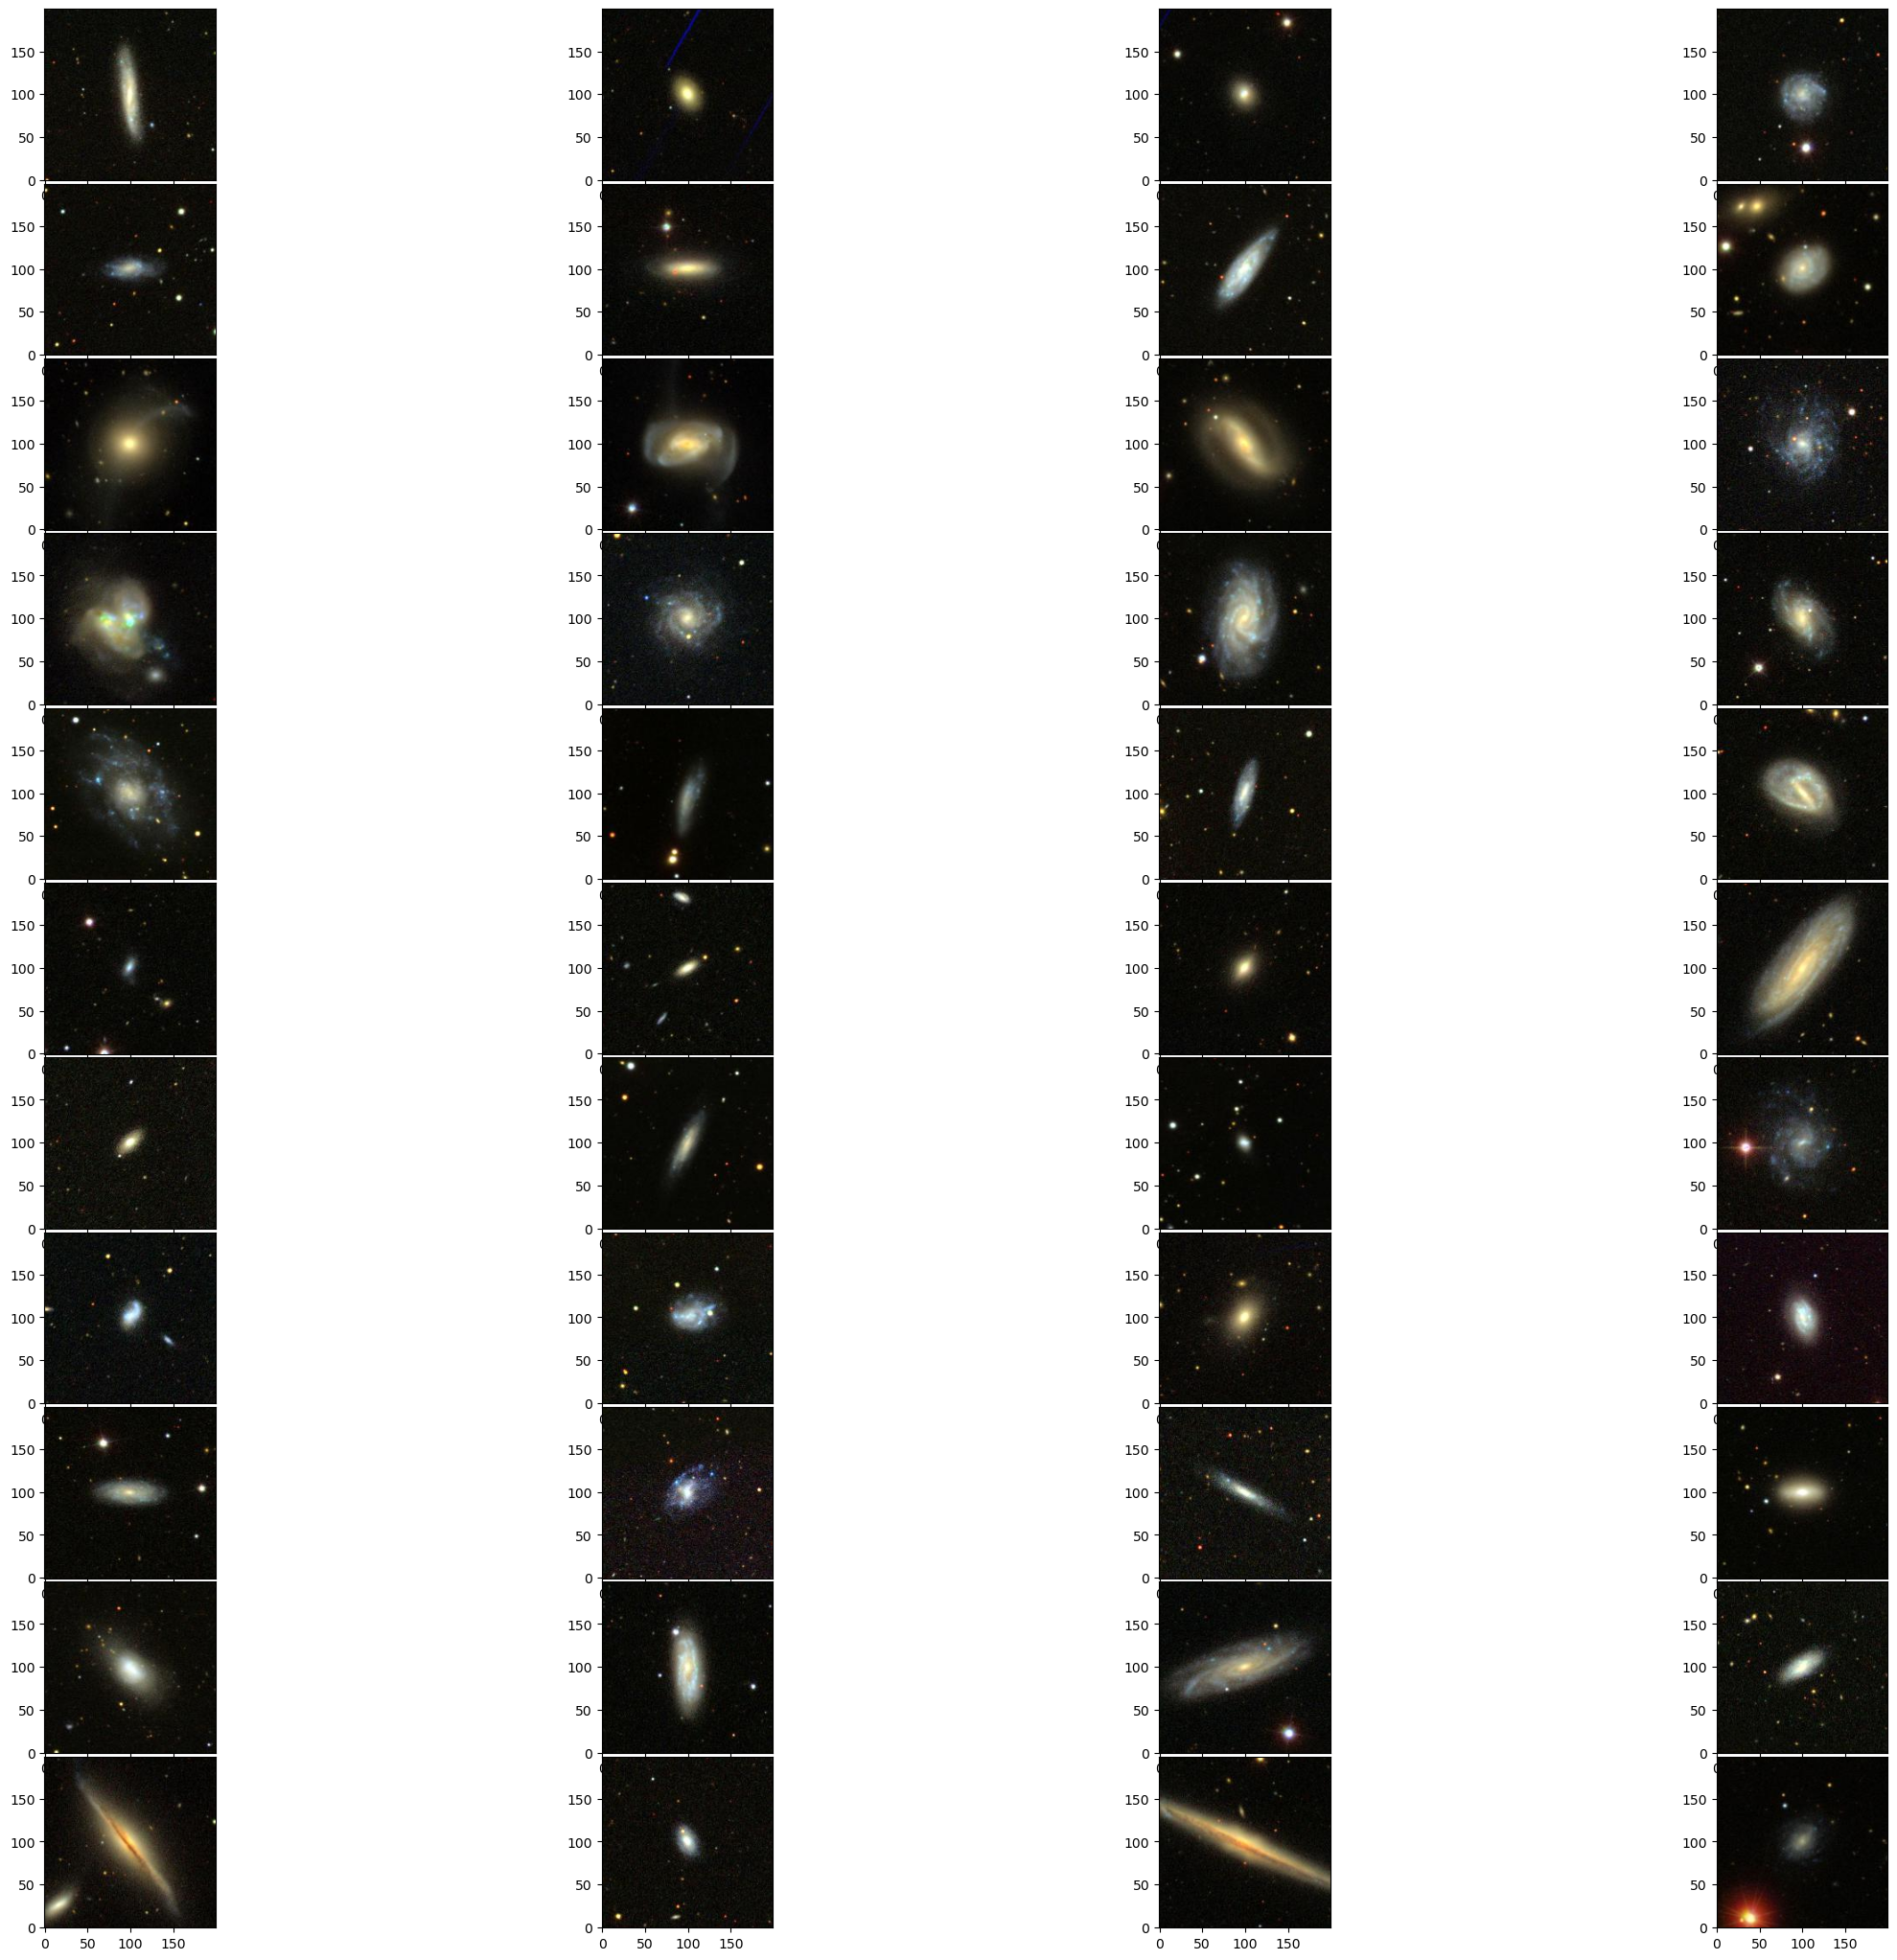

In [38]:
fig, axs = plt.subplots(len(low_z)//4, 4, figsize=(30, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .02, wspace=.001)

axs = axs.ravel()
i = 0
hips = 'CDS/P/SDSS9/color'

for row in low_z:
    cutout = hips2fits.query(
      hips=hips,
      width=200,
      height=200,
      ra=Longitude(row['_RA'] * u.deg),
      dec=Latitude(row['_DE'] * u.deg),
      fov=Angle(0.05 * u.deg),
      projection='SIN',
      format='jpg',
      min_cut=0.5,
      max_cut=99.9
    )
    axs[i].imshow(cutout, origin='lower')

    i += 1
    
    
